In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [15, 13]
plt.rcParams['figure.dpi'] = 100

In [2]:
df = pd.read_excel('cars.xls')

In [3]:
df.head()

Car   MPG  Weight  Drive_Ratio  Horsepower  \
0         Buick Estate Wagon  16.9   4.360         2.73         155   
1  Ford Country Squire Wagon  15.5   4.054         2.26         142   
2         Chevy Malibu Wagon  19.2   3.605         2.56         125   
3     Chrysler LeBaron Wagon  18.5   3.940         2.45         150   
4                   Chevette  30.0   2.155         3.70          68   

   Displacement  Cylinders  
0           350          8  
1           351          8  
2           267          8  
3           360          8  
4            98          4

In [4]:
df = df.set_index('Car')

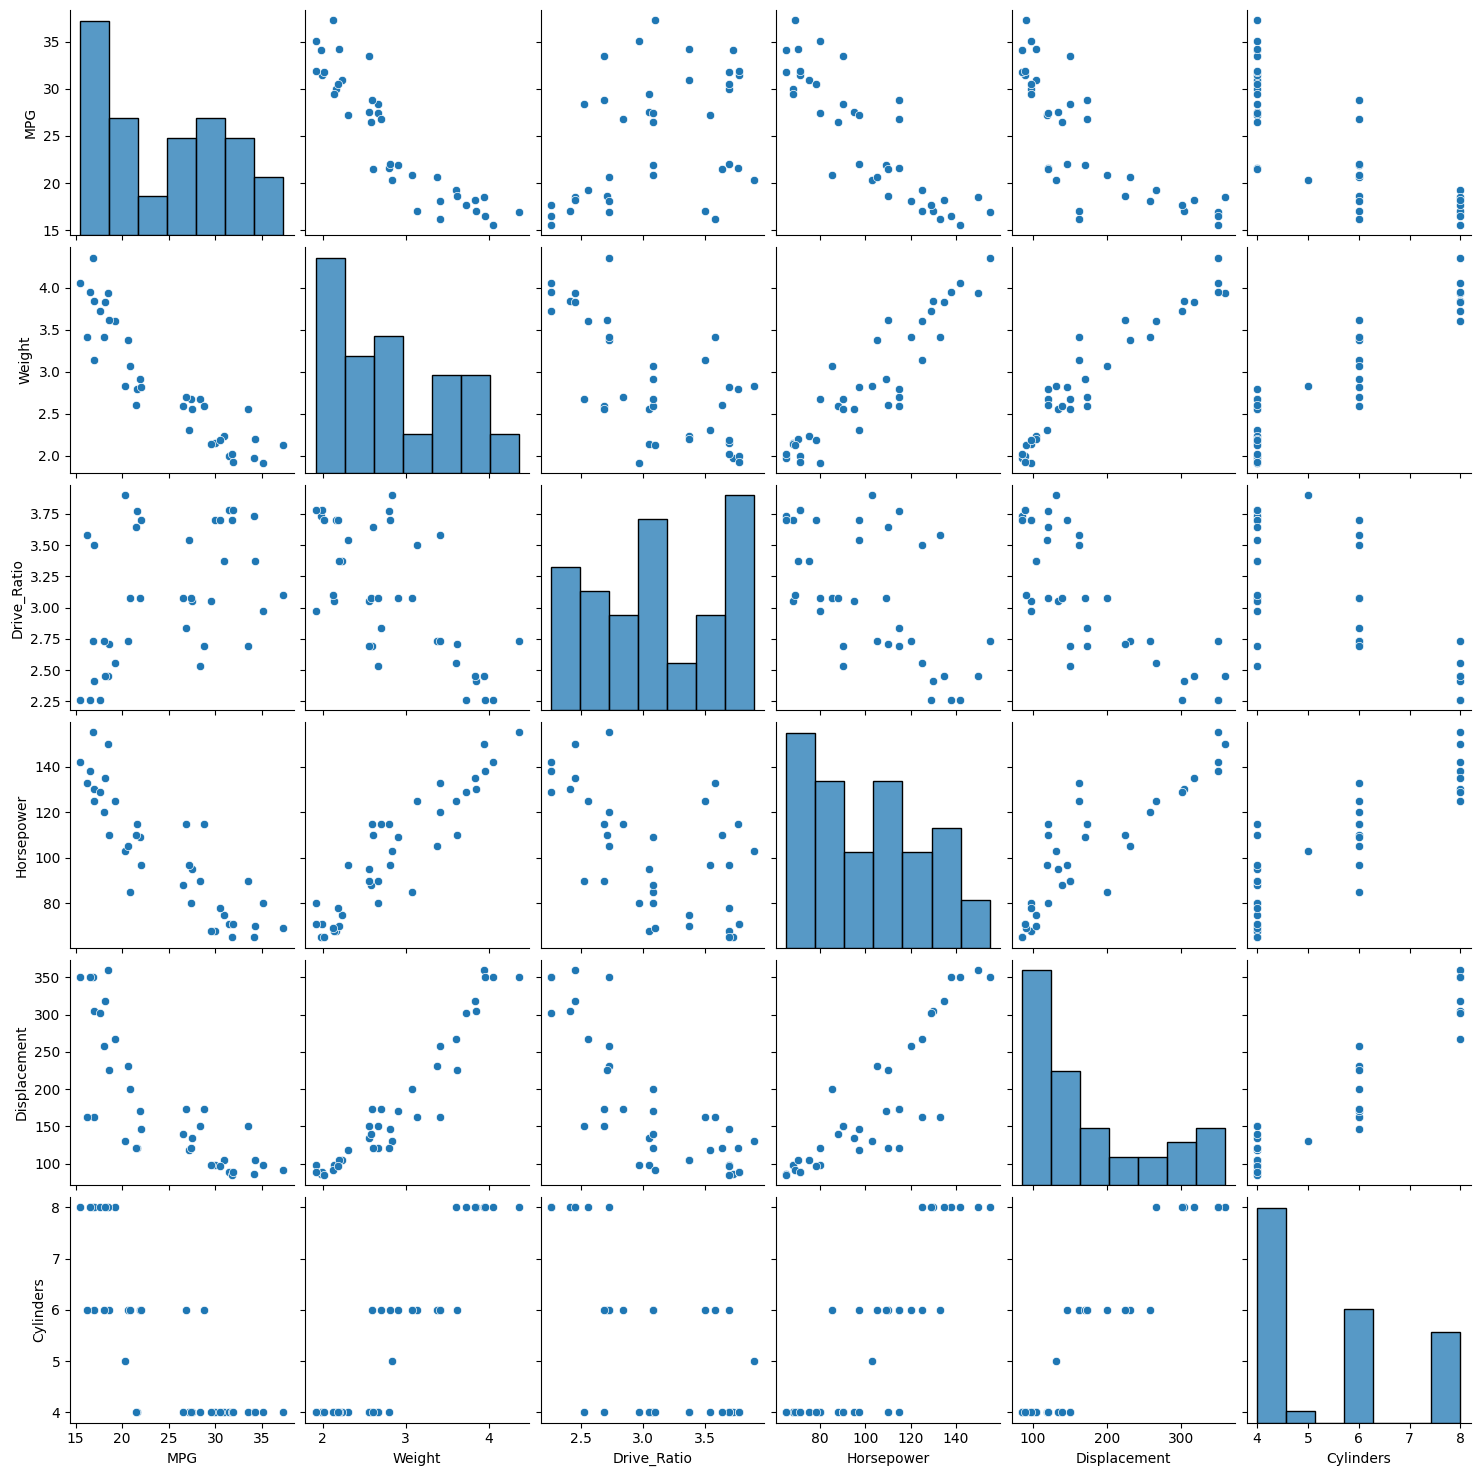

In [5]:
sb.pairplot(df)

In [6]:
from sklearn.preprocessing import StandardScaler

features = df.columns.difference(['MPG'])

x = df.loc[:, features].values
y = df.loc[:,['MPG']].values
x = StandardScaler().fit_transform(x)

x = pd.DataFrame(x, columns=df.columns.difference(['MPG']), index=df.index)

In [7]:
from sklearn.decomposition import PCA

pcamodel = PCA(n_components=5)

pca = pcamodel.fit_transform(x)

pca.shape

(38, 5)

In [8]:
pcamodel.components_

array([[ 0.46021262,  0.47442482, -0.38629544,  0.44293839,  0.46659066],
       [ 0.14727515, -0.05183336,  0.86341294,  0.42870613,  0.21529627],
       [-0.67494664, -0.20548845, -0.23893086,  0.6656694 ,  0.0449202 ],
       [ 0.49476659, -0.28796656, -0.1326893 ,  0.41212849, -0.69629372],
       [-0.25723032,  0.80441541,  0.17492718,  0.08397018, -0.49909709]])

In [9]:
components_df = pd.DataFrame(data=pcamodel.components_, columns=df.columns.difference(['MPG']))

In [10]:
components_df

Cylinders  Displacement  Drive_Ratio  Horsepower    Weight
0   0.460213      0.474425    -0.386295    0.442938  0.466591
1   0.147275     -0.051833     0.863413    0.428706  0.215296
2  -0.674947     -0.205488    -0.238931    0.665669  0.044920
3   0.494767     -0.287967    -0.132689    0.412128 -0.696294
4  -0.257230      0.804415     0.174927    0.083970 -0.499097

In [11]:
pcamodel.explained_variance_ratio_

array([0.86222072, 0.09318552, 0.02565342, 0.01357291, 0.00536743])

In [12]:
pcamodel.singular_values_

array([12.79929442,  4.2077605 ,  2.2077475 ,  1.60588093,  1.00985717])

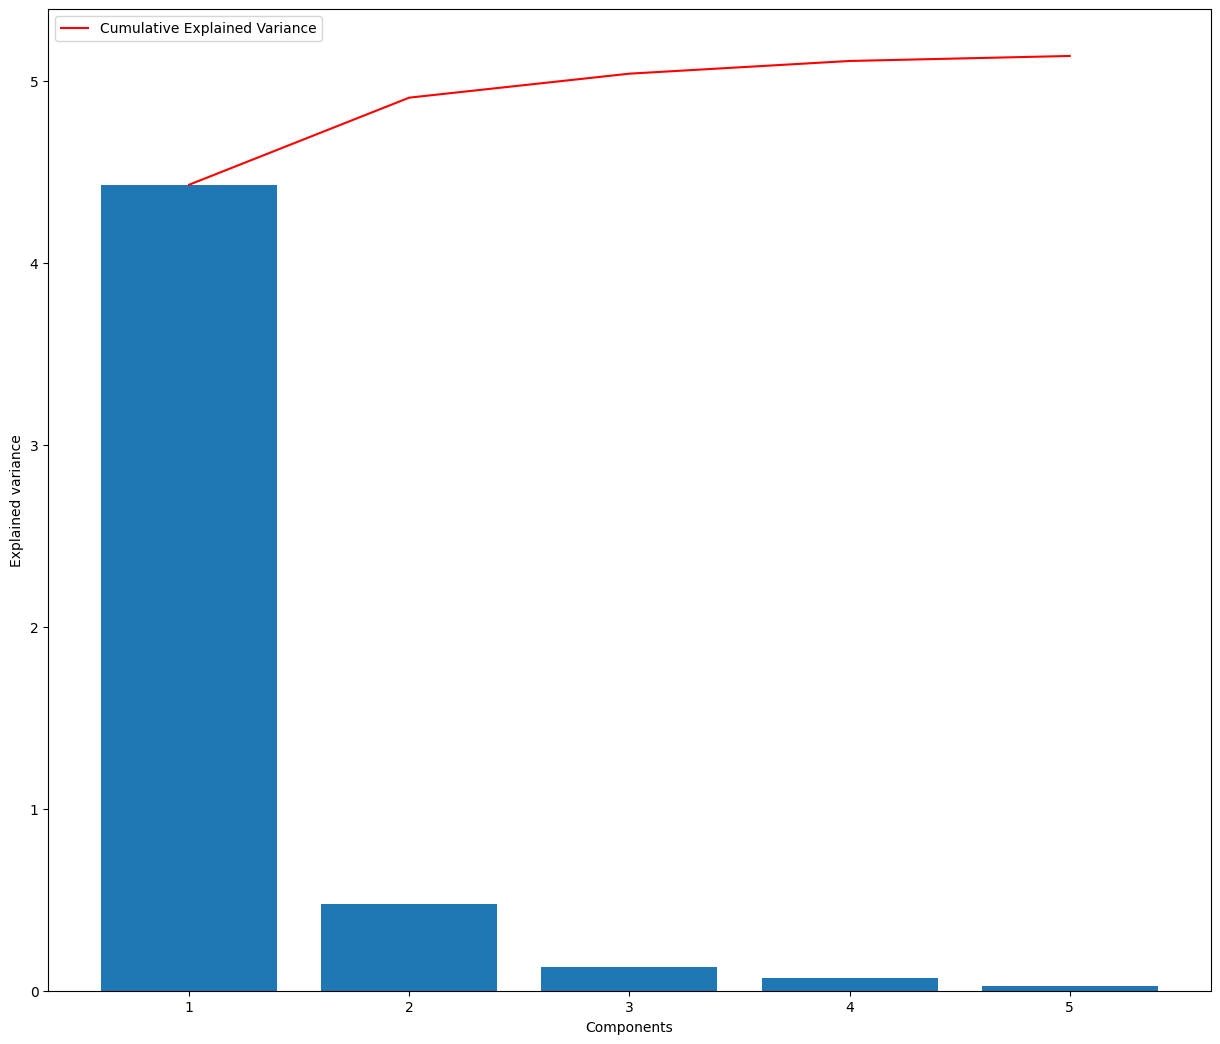

In [13]:
plt.bar(range(1,len(pcamodel.explained_variance_ )+1),pcamodel.explained_variance_ )
plt.ylabel('Explained variance')
plt.xlabel('Components')
plt.plot(range(1,len(pcamodel.explained_variance_ )+1),
         np.cumsum(pcamodel.explained_variance_),
         c='red',
         label="Cumulative Explained Variance")
plt.legend(loc='upper left')

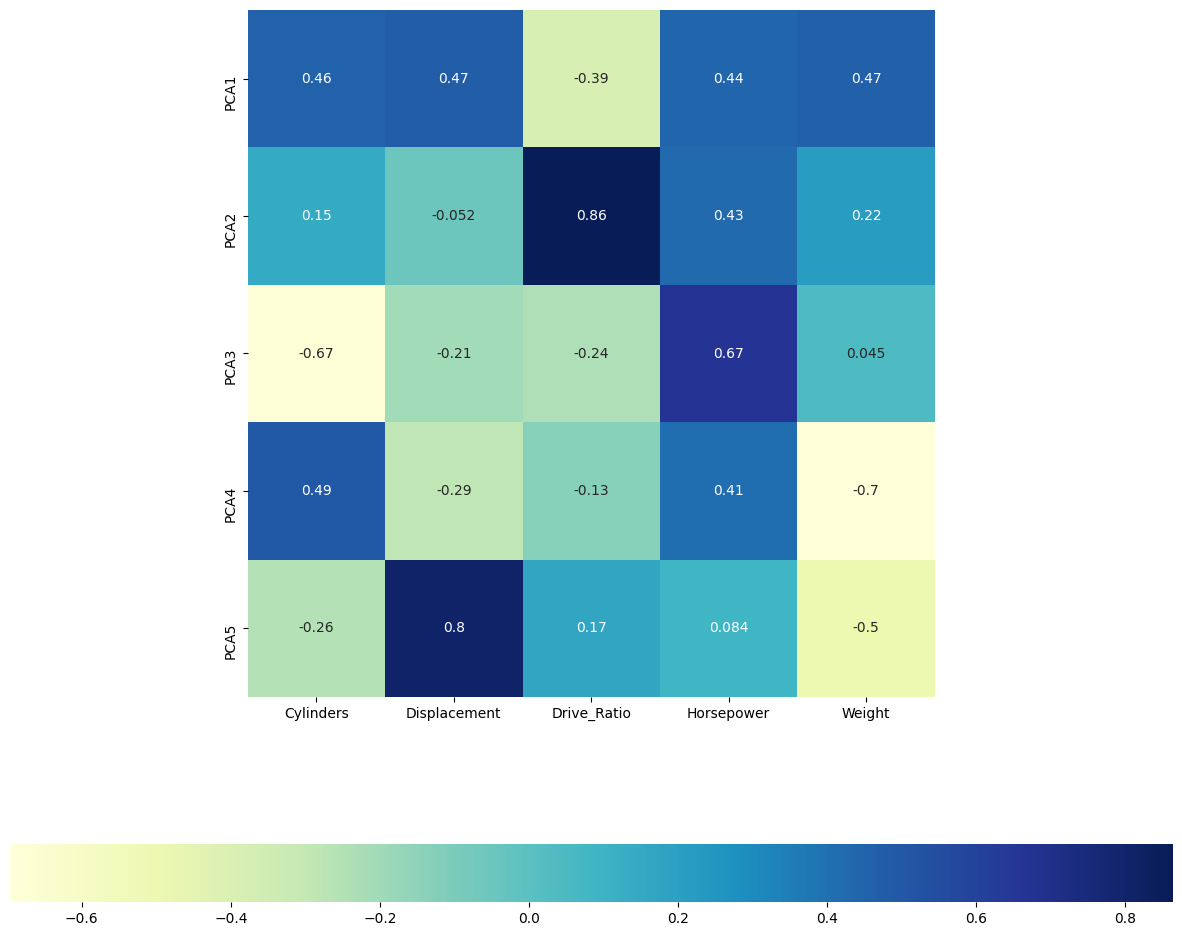

In [14]:
ax = sb.heatmap(pcamodel.components_,
                 cmap='YlGnBu',
                 yticklabels=[ "PCA"+str(x) for x in range(1,pcamodel.n_components_+1)],
                 xticklabels=list(x.columns),
                 annot=True,
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")

In [15]:
x = pd.DataFrame(x, columns=df.columns, index=df.index)

x[['PCA1','PCA2','PCA3','PCA4','PCA5']] = pca[:,0:5]

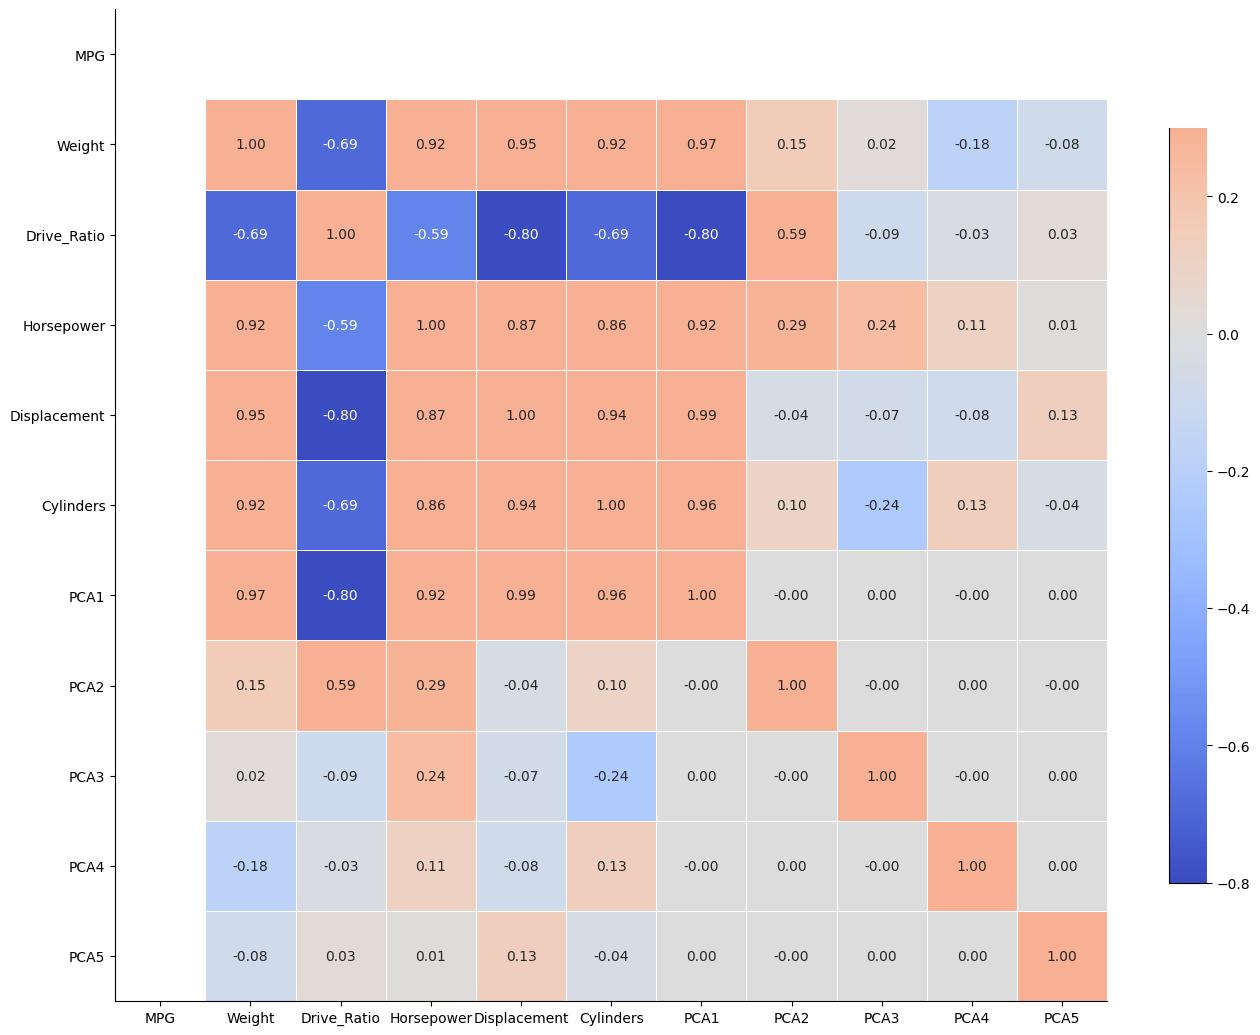

In [16]:
corr = x.corr().round(2)

plt.figure(figsize=(16, 20))
g = sb.heatmap(corr,  vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.2f', cmap='coolwarm', annot_kws={"fontsize":10})
sb.despine()

plt.show()

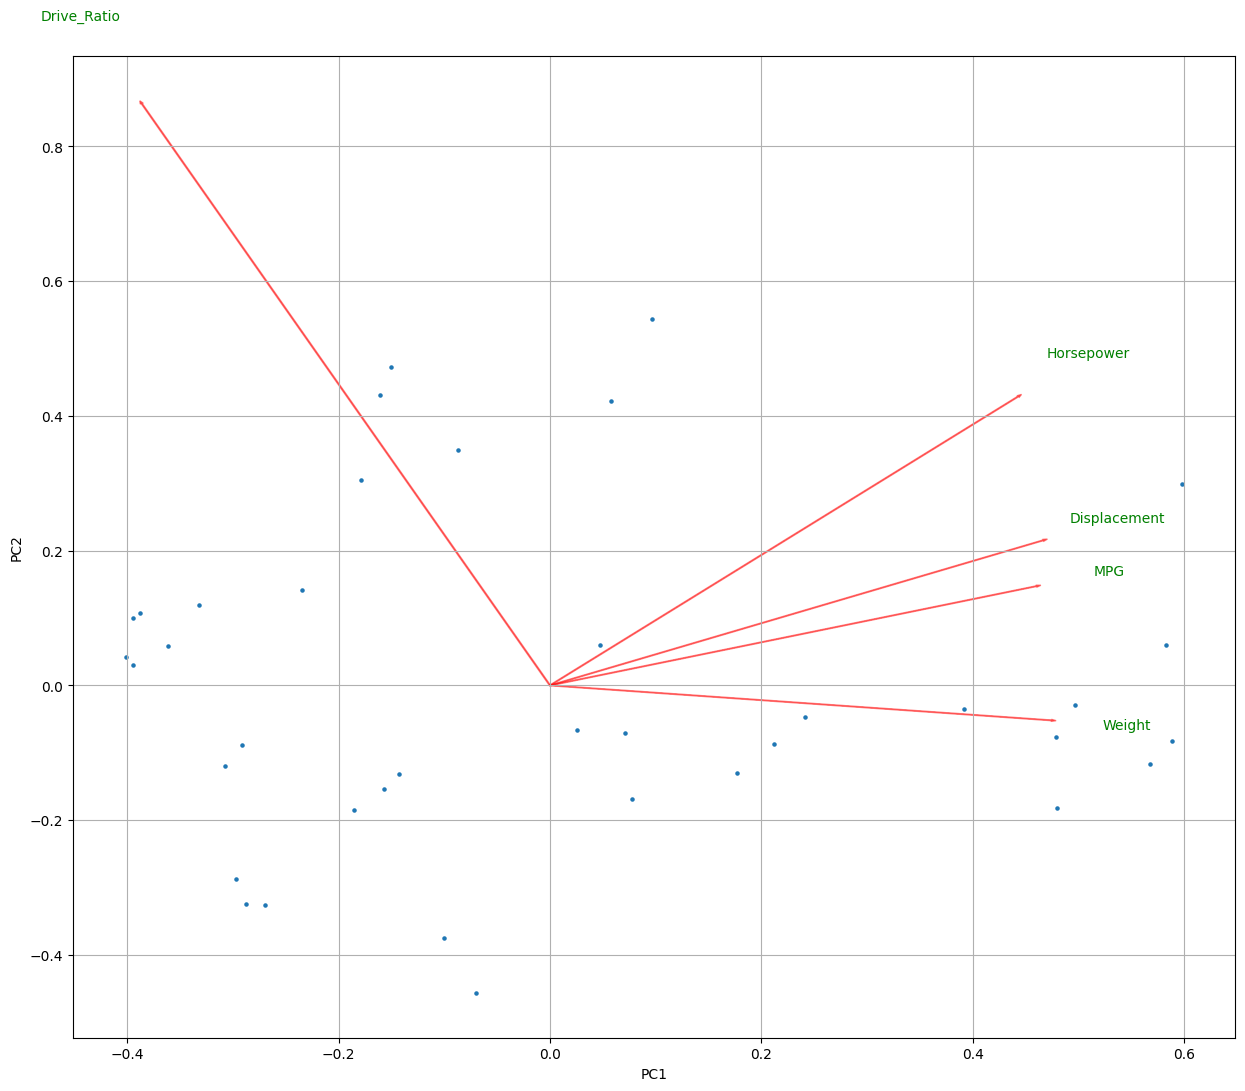

In [17]:
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley,s=5)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
 
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

myplot(pca[:,0:2],np.transpose(pcamodel.components_[0:2, :]),list(x.columns))
plt.show()

#### Tačke su vrednosi iz skupa podataka (automobili), a strelice su vektori koji reprezentuju koeficijente komponenti. Pogledati sledeću tabelu.

In [18]:
components_df

Cylinders  Displacement  Drive_Ratio  Horsepower    Weight
0   0.460213      0.474425    -0.386295    0.442938  0.466591
1   0.147275     -0.051833     0.863413    0.428706  0.215296
2  -0.674947     -0.205488    -0.238931    0.665669  0.044920
3   0.494767     -0.287967    -0.132689    0.412128 -0.696294
4  -0.257230      0.804415     0.174927    0.083970 -0.499097

#### Na primer, atribut Drive_Ratio je značajniji za PCA2, od PCA1 jer ima veći koeficijent po apsolutnoj vrednosti, a njegova lokacija na grafiku je (-0.386295, 0.863413).
#### Veliki broj cilinara, kubikaža, broj konjskih snaga i težina su pozitivnoj korelaciji sa PCA1.

In [19]:
x.head()

MPG    Weight  Drive_Ratio  Horsepower  \
Car                                                                 
Buick Estate Wagon         NaN  2.146364    -0.711473    2.041152   
Ford Country Squire Wagon  NaN  1.707660    -1.631598    1.542966   
Chevy Malibu Wagon         NaN  1.063939    -1.044284    0.891491   
Chrysler LeBaron Wagon     NaN  1.544220    -1.259633    1.849542   
Chevette                   NaN -1.014892     1.187506   -1.292864   

                           Displacement  Cylinders      PCA1      PCA2  \
Car                                                                      
Buick Estate Wagon             1.969344   1.647029  3.872707  0.863352   
Ford Country Squire Wagon      1.980747   1.647029  3.808194 -0.239713   
Chevy Malibu Wagon             1.022931   1.647029  2.537989 -0.100854   
Chrysler LeBaron Wagon         2.083370   1.647029  3.772728  0.172370   
Chevette                      -0.904104  -0.881743 -2.339645  0.169551   

                               PCA3      PCA4      PCA5  
Car                                                      
Buick Estate Wagon         0.108807 -0.311089  0.136201  
Ford Country Squire Wagon -0.025024 -0.092131  0.161542  
Chevy Malibu Wagon        -0.431114  0.285486 -0.239628  
Chrysler LeBaron Wagon     0.061750  0.069112  0.416475  
Chevette                  -0.409029 -0.159638  0.105231

In [20]:
x[['PCA1','PCA2']] = pca[:,[0,1]]

In [21]:
x.head()

MPG    Weight  Drive_Ratio  Horsepower  \
Car                                                                 
Buick Estate Wagon         NaN  2.146364    -0.711473    2.041152   
Ford Country Squire Wagon  NaN  1.707660    -1.631598    1.542966   
Chevy Malibu Wagon         NaN  1.063939    -1.044284    0.891491   
Chrysler LeBaron Wagon     NaN  1.544220    -1.259633    1.849542   
Chevette                   NaN -1.014892     1.187506   -1.292864   

                           Displacement  Cylinders      PCA1      PCA2  \
Car                                                                      
Buick Estate Wagon             1.969344   1.647029  3.872707  0.863352   
Ford Country Squire Wagon      1.980747   1.647029  3.808194 -0.239713   
Chevy Malibu Wagon             1.022931   1.647029  2.537989 -0.100854   
Chrysler LeBaron Wagon         2.083370   1.647029  3.772728  0.172370   
Chevette                      -0.904104  -0.881743 -2.339645  0.169551   

                               PCA3      PCA4      PCA5  
Car                                                      
Buick Estate Wagon         0.108807 -0.311089  0.136201  
Ford Country Squire Wagon -0.025024 -0.092131  0.161542  
Chevy Malibu Wagon        -0.431114  0.285486 -0.239628  
Chrysler LeBaron Wagon     0.061750  0.069112  0.416475  
Chevette                  -0.409029 -0.159638  0.105231

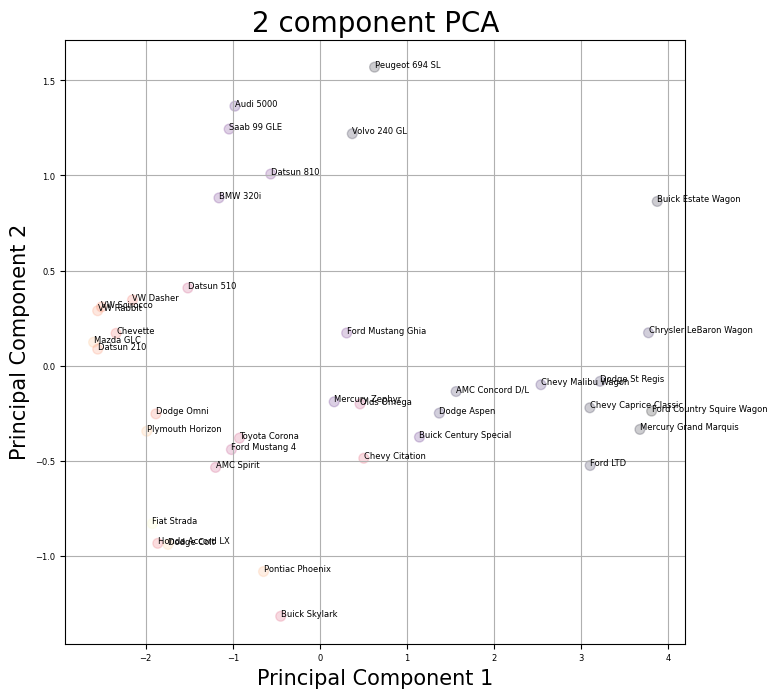

In [22]:
plt.rcParams.update({'font.size': 6})

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

cmap = sb.color_palette("magma", as_cmap=True)

ax.scatter(x['PCA1']
               , x['PCA2']
               , c = df['MPG']
               , s = 50
               , alpha = 1/5
               , cmap = cmap)
#ax.legend(targets)
ax.grid()

X_pos=x['PCA1']
Y_pos=x['PCA2']

annotations=x.index

for i, label in enumerate(annotations):
    plt.annotate(label, (X_pos[i], Y_pos[i]))

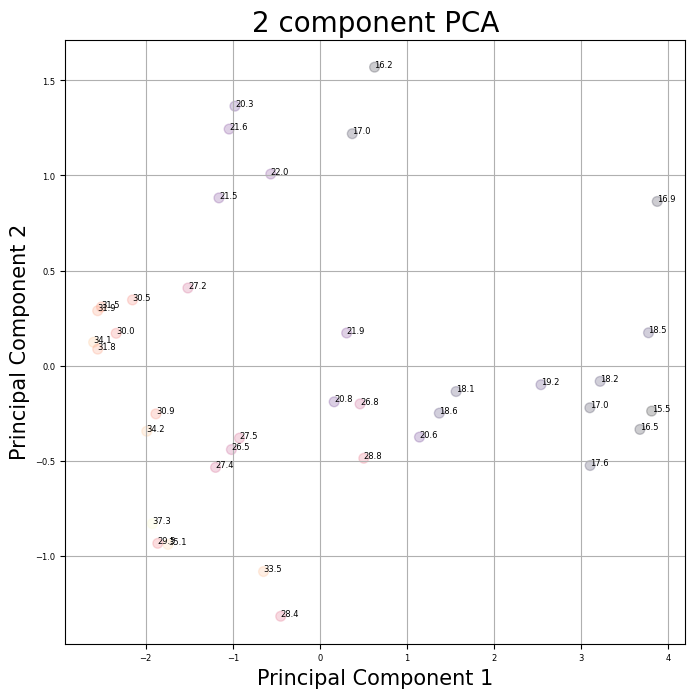

In [23]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

cmap = sb.color_palette("magma", as_cmap=True)

ax.scatter(x['PCA1']
               , x['PCA2']
               , c = df['MPG']
               , s = 50
               , alpha = 1/5
               , cmap = cmap)
#ax.legend(targets)
ax.grid()

X_pos=x['PCA1']
Y_pos=x['PCA2']

annotations=df['MPG']

for i, label in enumerate(annotations):
    plt.annotate(label, (X_pos[i], Y_pos[i]))